In [1]:
from google.colab import drive
drive.mount("/content/drive")
import zipfile 
with zipfile.ZipFile('/content/drive/My Drive/Vision_Arcadia/Hand_Gestures_Dataset.zip','r') as zip_ref:
    zip_ref.extractall('/content/data/')

Mounted at /content/drive


In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import pandas as pd
from skimage.transform import resize
from imageio import imread
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random as rn

rn.seed(30)
from keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

tf.random.set_seed(30)

In [3]:
train_dir = "/content/data/Hand_Gestures_Dataset_new/train"
test_dir = "/content/data/Hand_Gestures_Dataset_new/val"
img_size = (320, 120)


In [4]:
train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=False,
                                   rescale=1. / 255,
                                   validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.8)


In [5]:
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=img_size,
                                                    batch_size=64,
                                                    color_mode="grayscale",
                                                    class_mode="categorical",
                                                    subset="training",
                                                    shuffle=True,
                                                    seed=42)
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    shuffle=True,
    seed=42)
#same for testing

Found 19600 images belonging to 7 classes.
Found 8400 images belonging to 7 classes.


In [6]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(320, 120, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        # 1st hidden dense layer
        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
    
        # 2nd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
    
        # 3rd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
    
        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 118, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 59, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 159, 59, 64)       18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 159, 59, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 79, 29, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 79, 29, 128)       5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
epochs = 6
batch_size = 64

In [13]:
history = model.fit(x=train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/6
307/307 [==============================] - 217s 705ms/step - loss: 0.2914 - accuracy: 0.9929 - val_loss: 0.6690 - val_accuracy: 0.8552
Epoch 2/6
307/307 [==============================] - 214s 697ms/step - loss: 0.2049 - accuracy: 0.9958 - val_loss: 1.1576 - val_accuracy: 0.7994
Epoch 3/6
307/307 [==============================] - 215s 699ms/step - loss: 0.1488 - accuracy: 0.9960 - val_loss: 0.7205 - val_accuracy: 0.9099
Epoch 4/6
307/307 [==============================] - 218s 711ms/step - loss: 0.1217 - accuracy: 0.9955 - val_loss: 0.7725 - val_accuracy: 0.8945
Epoch 5/6
307/307 [==============================] - 215s 701ms/step - loss: 0.1328 - accuracy: 0.9934 - val_loss: 1.2198 - val_accuracy: 0.7481
Epoch 6/6
307/307 [==============================] - 216s 702ms/step - loss: 0.1120 - accuracy: 0.9959 - val_loss: 0.5719 - val_accuracy: 0.8824


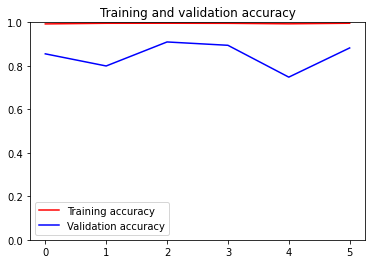

<Figure size 432x288 with 0 Axes>

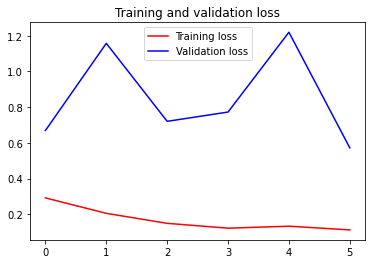

In [14]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim([0.00, 1.00])
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [15]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)
print("final train accuracy = {:.2f}, validation accuracy = {:.2f}".format(
    train_acc * 100, test_acc * 100))

132/132 [==============================] - 52s 395ms/step - loss: 0.5719 - accuracy: 0.8824
final train accuracy = 98.70, validation accuracy = 88.24


In [16]:
model.save("/content/Model_Hand_Gestures")

INFO:tensorflow:Assets written to: /content/Model_Hand_Gestures/assets


In [17]:
!zip -r /content/Model_Hand_Gestures.zip /content/Model_Hand_Gestures

  adding: content/Model_Hand_Gestures/ (stored 0%)
  adding: content/Model_Hand_Gestures/keras_metadata.pb (deflated 94%)
  adding: content/Model_Hand_Gestures/assets/ (stored 0%)
  adding: content/Model_Hand_Gestures/saved_model.pb (deflated 90%)
  adding: content/Model_Hand_Gestures/variables/ (stored 0%)
  adding: content/Model_Hand_Gestures/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/Model_Hand_Gestures/variables/variables.index (deflated 73%)


In [19]:
files.download('/content/Model_Hand_Gestures.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>